# Online Shoppers Intention (By Adeniran Michael)

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top e-commerce site. The data set was formed so that each sesseion would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. This dataset has very few missing values and all features of the dataset are relevant to the purchasing intention based on reference.


## Problem statement

* The primary purpose of the data set is to predict the purchasing intentions of a visitor
 to this particular store's website.
    


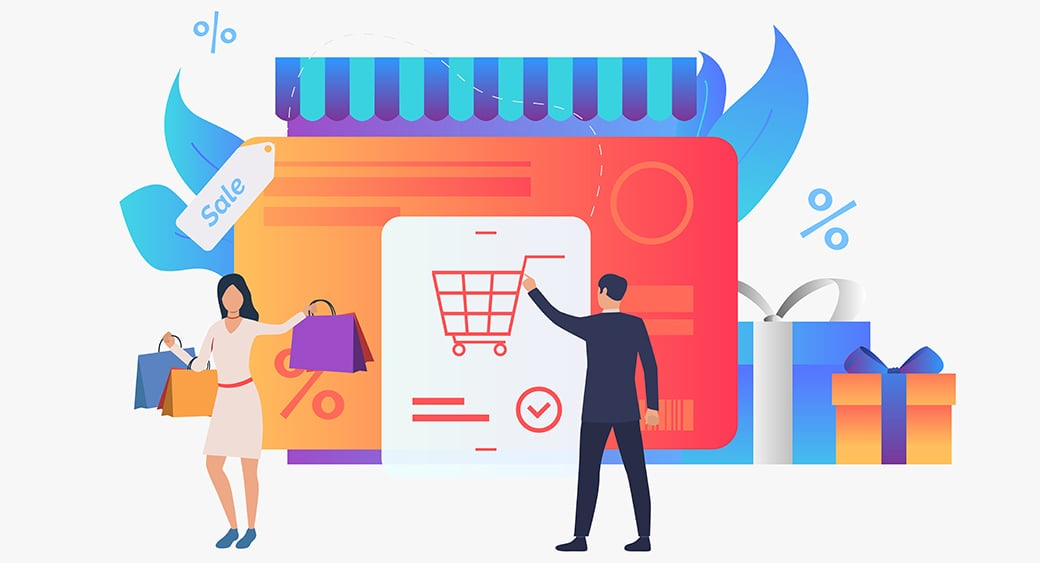

In [1]:
#import numpy and pandas for data manipulation
import numpy as np
import pandas as pd

#import pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation
from datetime import datetime as dt
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator() # every year
months = mdates.MonthLocator() # every month
months_fmt = mdates.DateFormatter('%m')

In [10]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [78]:
#displaying the first five
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [79]:
#displaying the last five
df.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


#  Data Inspection and Manipulation

In [9]:
# nos of rows and columns
df.shape

(12330, 18)

In [11]:
# information about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
# check the columns of the dataset
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
# check missing values
df.isna()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#sum of missing values in different columns
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

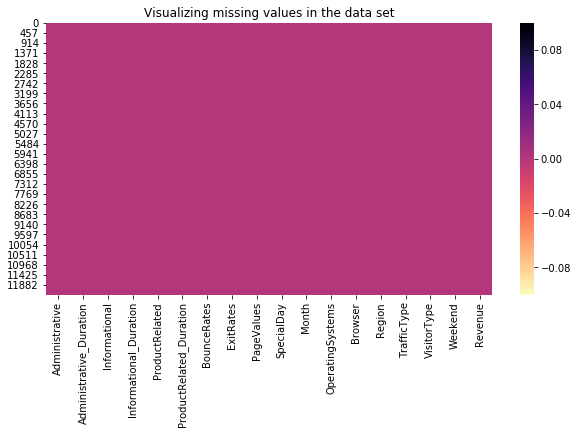

In [16]:
# visualizing missing values
plt.figure(figsize=(10,5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r')

In [17]:
#statistical descriptive analysis of the numerical data
df.describe().astype('int')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
mean,2,80,0,34,31,1194,0,0,5,0,2,2,3,4
std,3,176,1,140,44,1913,0,0,18,0,0,1,2,4
min,0,0,0,0,0,0,0,0,0,0,1,1,1,1
25%,0,0,0,0,7,184,0,0,0,0,2,2,1,2
50%,1,7,0,0,18,598,0,0,0,0,2,2,3,2
75%,4,93,0,0,38,1464,0,0,0,0,3,2,4,4
max,27,3398,24,2549,705,63973,0,0,361,1,8,13,9,20


# Exploratory Data Analysis: Relationship, insights, and Visualizations

* Univariate
* Bivariate
* Multivariate


## Univariate Analysis

* Generating insight on a feature(variable)

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [20]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [21]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [23]:
# Total Revenue: Number of completed purchases
df_rev = df['Revenue'].sum()
df_rev

1908

## Observation
* There are 1908 of completed purchases made by online shoppers





## Administrative Analysis

In [24]:
# total number of users that visisted from the administrative page
df['Administrative'].sum()

28546

In [25]:
# maximumu number of pages visited by users
df['Administrative'].max()

27

In [26]:
# minimum number of pages visited by users
df['Administrative'].min()

0

In [27]:
# average number of pages visited by the users
round(df['Administrative'].mean(),)

2

In [32]:
# maximum duration spent by the users on the administrative page
max_dur = (df['Administrative_Duration'].max())/60
round(max_dur, )

57

In [34]:
# average duration spent by the users on the administrative page
avg_dur = (df['Administrative_Duration'].mean())/60
round(avg_dur, )

1

In [35]:
# total duration spent by the users on the administrative page
Tot_dur = (df['Administrative_Duration'].sum())/3600
round(Tot_dur, )

277.0

## Observations

* It is observed that the total administrative pages is 28546
* Users spent a total of 277 hours while shopping and the maximum duration is 57min
* The maximum number of Administrative pages is 27, compared to the number of 2 visited by the shoppers in 1 hour

## Product Analysis

In [38]:
#total number of product pages visited
tot_pro = df['ProductRelated'].sum()
tot_pro

391249

In [39]:
# maximum number of product pages visited by the users
max_pro = df['ProductRelated'].max()
max_pro

705

In [41]:
# average number pf product pages visited by users
avg_pro = df['ProductRelated'].mean()
round(avg_pro)

32

In [42]:
# total duration spent on product pages
tot_dur = (df['ProductRelated_Duration'].sum())/3600
round(tot_dur,)

4092.0

In [44]:
# Maximum number of duration spent by the users during their online shopping
max_dur = (df['ProductRelated_Duration'].max())/3600
round(max_dur)

18

In [46]:
# average duration spent by the users during their online shopping
avg_dur = (df['ProductRelated_Duration'].mean())/60
round(avg_dur)

20

## Observations
* Users visted a total of 391249 product-related pages
* The maximum duration spent is 18 minutes, while the average time spent is 20 minutes
* The maximum number of pages visited is 705 compared to an average of 32

## Informational Analysis

In [3]:
# total number of information pages visited by users
tot_info = df['Informational'].sum()
tot_info

6209

In [4]:
#maximum number of information pages visited by users
max_info = df['Informational'].max()
max_info

24

In [10]:
#average number of information pages visited by users
avg_info = df['Informational'].mean()
round(avg_info, 1)

0.5

In [11]:
#total duration spent on the information pages visited by users
tot_info_dur = (df['Informational_Duration'].sum())/3600
round(tot_info_dur, 2)

118.07

In [13]:
#total duration spent on the information pages visited by users
avg_info_dur = (df['Informational_Duration'].mean())/60
round(avg_info_dur, 1)

0.6

In [17]:
#maximum duration spent on the information pages visited by users
max_info_dur = (df['Informational_Duration'].max())/60
round(max_info_dur, 1)

42.5

## Observations
* The informational page has 6209 users compared to the administrative and product page.
* A total of 118 hours was spent by the visitors on the informational page, an avegrage of 0.6 mins was spent and the maximum duration was 42.5 mins
* Maximum visitors of the informational page was 24 and the average was 0.5

## Browser Analysis

In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [19]:
# total browser opened by users
tot_bro = df.Browser.sum()
tot_bro

29063

In [20]:
# browser categories used
df.groupby('Browser').sum().astype(int)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Region,TrafficType,Weekend,Revenue
Browser,,,,,,,,,,,,,,,
1,5376,199152,1200,72321,60086,2215789,64,115,13556,127,3401,7112,8365,704,365
2,19345,661983,4327,304306,276985,10445959,170,333,45511,507,18568,25268,34108,1785,1223
3,141,6732,28,2117,1724,74907,3,6,271,9,314,295,453,33,5
4,1460,50728,268,18334,22411,853353,12,29,4948,42,1471,2416,2285,118,130
5,1056,33505,183,12341,14633,548554,9,19,3726,30,1001,1451,1533,94,86
6,334,14337,72,6757,5198,207396,3,7,923,17,367,500,648,32,20
7,137,2609,23,2379,1259,46329,1,2,169,2,111,172,194,16,6
8,189,8307,19,512,2433,84241,4,7,706,7,135,455,897,45,21
9,2,390,0,0,10,1169,0,0,0,0,3,9,2,0,0


## Bivariate Analysis
* generating insights by comparing two variables to see how correlated they are

In [22]:
# Administrative pages by month
df_mon = df['Administrative'].groupby(df.Month).sum().sort_index(ascending=True)[:10]
df_mon

Month
Aug     1358
Dec     3793
Feb      100
Jul     1047
June     655
Mar     3600
May     6610
Nov     7847
Oct     2042
Sep     1494
Name: Administrative, dtype: int64

C:\Users\User\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


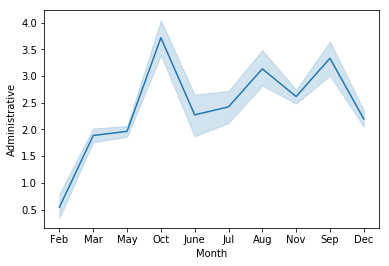

In [23]:
# admin pages trend by month
sns.lineplot(x='Month', y='Administrative', data=df, sort=False)

In [25]:
#administrative duration spent by month
dur_mon = df['Administrative'].groupby(df.Month).sum().sort_index(ascending=True)
round(dur_mon, 1)

Month
Aug     1358
Dec     3793
Feb      100
Jul     1047
June     655
Mar     3600
May     6610
Nov     7847
Oct     2042
Sep     1494
Name: Administrative, dtype: int64

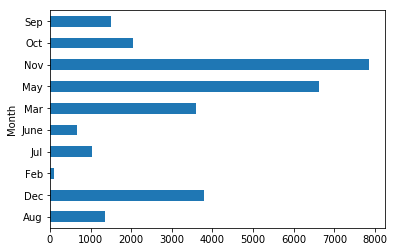

In [26]:
dur_mon.plot.barh()

In [27]:
#administrative duration by bouncerate
admin_bounce = round(df['BounceRates'].groupby(df.Administrative).sum().sort_index(ascending=True))
admin_bounce

Administrative
0     224.0
1      14.0
2       9.0
3       6.0
4       5.0
5       4.0
6       3.0
7       2.0
8       2.0
9       1.0
10      1.0
11      1.0
12      1.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
26      0.0
27      0.0
Name: BounceRates, dtype: float64

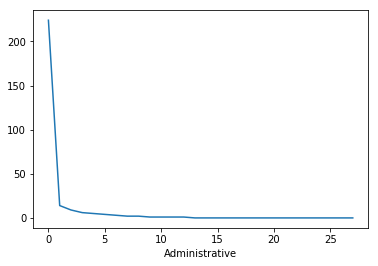

In [28]:
admin_bounce.plot()

In [29]:
#administrative pages spent by Weekends
admin_weekend = df['Administrative'].groupby(df.Weekend).sum()
admin_weekend

Weekend
False    21449
True      7097
Name: Administrative, dtype: int64

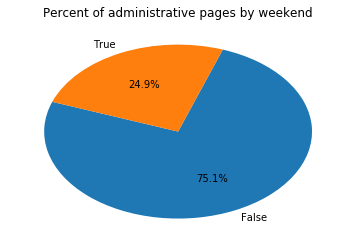

In [33]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(admin_weekend, labels=admin_weekend.index, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Percent of administrative pages by weekend')
plt.show()

In [34]:
#administrative duration spent by weekend
admin_dur_weekend = round(df['Administrative'].groupby(df.Weekend).sum())/3600
admin_dur_weekend

Weekend
False    5.958056
True     1.971389
Name: Administrative, dtype: float64

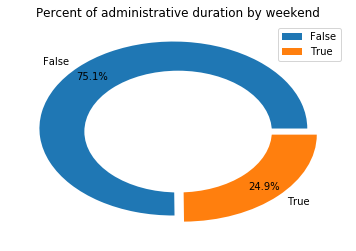

In [35]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.05, 0.05)
plt.pie(admin_weekend, labels=admin_dur_weekend.index, colors=colors, autopct='%1.1f%%', explode=explode, pctdistance=0.85)
center_circle = plt.Circle((0,0), 0.70, fc ='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.legend(labels=admin_dur_weekend.index, loc='upper right')
plt.title('Percent of administrative duration by weekend')
plt.show()

# Observation
* 24.9% prefer to visit the adminstrative page during weekends.

In [36]:
# Administrative pages by Revenue
admin_rev = df['Administrative'].groupby(df.Revenue).sum()
admin_rev

Revenue
False    22071
True      6475
Name: Administrative, dtype: int64

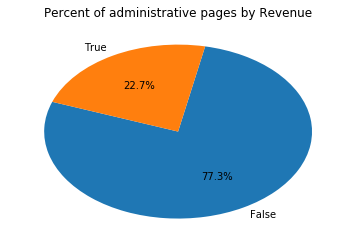

In [38]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(admin_rev, labels=admin_rev.index, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Percent of administrative pages by Revenue')
plt.show()

## Observation
* 77.3% of users visited the administrative page, 22.7%, however, made a purchase

In [39]:
# Administrative pages by Visitor
admin_vis = df['Administrative'].groupby(df.VisitorType).sum()
admin_vis

VisitorType
New_Visitor           4323
Other                  125
Returning_Visitor    24098
Name: Administrative, dtype: int64

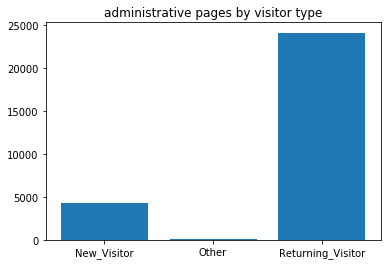

In [40]:
#visualize administrative pages by visitor type
plt.bar(x = admin_vis.index, height=admin_vis)
plt.title('administrative pages by visitor type')
plt.show()

In [41]:
admin_dur_vis = round(df['Administrative_Duration'].groupby(df.VisitorType).sum())/3600
admin_dur_vis

VisitorType
New_Visitor           43.249444
Other                  1.480278
Returning_Visitor    232.074167
Name: Administrative_Duration, dtype: float64

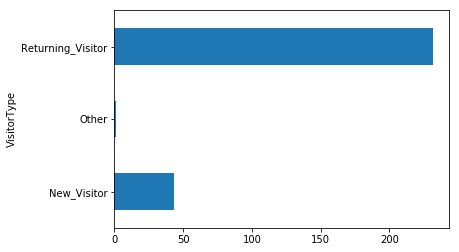

In [42]:
admin_dur_vis.plot.barh()

## Observation
* returning visitors visited the administrative page the most with 24098 and spent 232 hours compared to new visitors and others

In [46]:
# Administartive page by Traffic type
admin_traf = df['Administrative'].groupby(df.TrafficType).sum()
admin_traf

TrafficType
1      4682
2     11307
3      3698
4      2511
5       906
6       903
7       116
8       987
9        82
10     1051
11      435
12        0
13     1317
14       44
15       52
16        9
17        0
18       21
19       24
20      401
Name: Administrative, dtype: int64

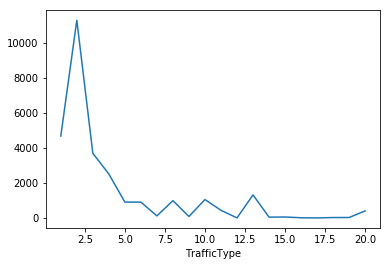

In [47]:
admin_traf.plot()

In [48]:
# Administartive page by Region
admin_reg = df['Administrative'].groupby(df.Region).sum()
admin_reg

Region
1    10857
2     2731
3     5878
4     2722
5      783
6     1655
7     1792
8     1077
9     1051
Name: Administrative, dtype: int64

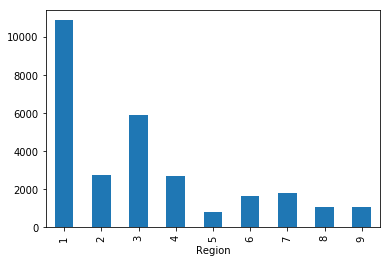

In [49]:
admin_reg.plot.bar()

In [52]:
# Administartive page duration spent by region
admin_dur_reg= (df['Administrative_Duration'].groupby(df.Region).sum())/3600
admin_dur_reg

Region
1    105.754789
2     27.415994
3     55.426318
4     27.265878
5      7.790690
6     15.337827
7     16.651510
8     10.799555
9     10.361179
Name: Administrative_Duration, dtype: float64

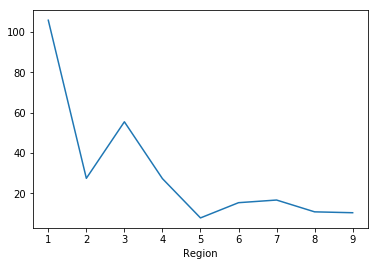

In [53]:
admin_dur_reg.plot()

## Observation 
* It is seen that most of the users that spent more time on the administrative page were from region 1 with 106 of them doing it.
it is followed by region 3 with 55.
* Traffic 2 has the highest number of users with a total of 11307

## Product Analysis

In [54]:
# view the first five rows of data set
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [55]:
# Product pages by month
df_pro = df['ProductRelated'].groupby(df.Month).sum().sort_index(ascending=True)[:10]
df_pro

Month
Aug      16566
Dec      48347
Feb       2058
Jul      15728
June     10387
Mar      37775
May      89105
Nov     138024
Oct      18428
Sep      14831
Name: ProductRelated, dtype: int64

C:\Users\User\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


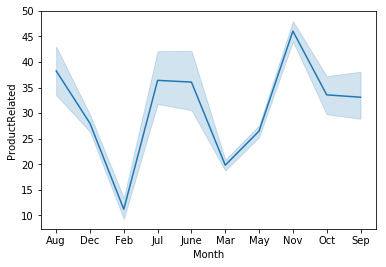

In [56]:
#product trend
sns.lineplot(x = 'Month', y = 'ProductRelated', data = df, sort=True)

In [57]:
# number of product pages visted by bounce rate
pro_bounce = df['ProductRelated'].groupby(df.BounceRates).sum().sort_index(ascending=True)[:10]
pro_bounce

BounceRates
0.000000    110066
0.000027       179
0.000034       187
0.000038       518
0.000039       310
             ...  
0.175000         4
0.176923        12
0.180000        17
0.183333         6
0.200000       960
Name: ProductRelated, Length: 1872, dtype: int64

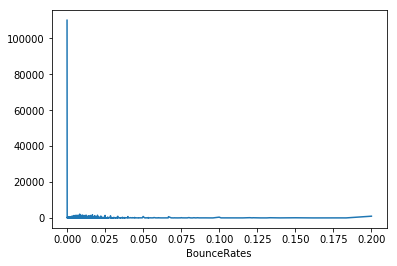

In [58]:
pro_bounce.plot()

In [64]:
#Top 5 total bounce by product related pages
# Administrative pages by month
top_5 = df.groupby('ProductRelated').BounceRates.sum().head(5).astype(float).sort_index(ascending=True)
top_5

ProductRelated
0      3.730000
1    107.353333
2     22.718056
3     15.567320
4     11.205397
Name: BounceRates, dtype: float64

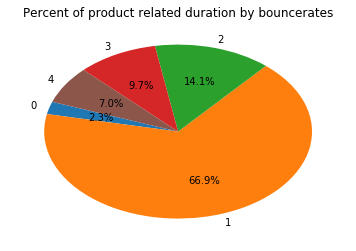

In [65]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(top_5, labels=top_5.index, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Percent of product related duration by bouncerates')
plt.show()

## observation
* 67% of users visited product 1
* The product related pages recorded a total of 138024

In [67]:
# product page visited by month
pro_vs = df['ProductRelated'].groupby(df.VisitorType).sum().sort_index(ascending=True)
pro_vs

VisitorType
New_Visitor           30585
Other                  1060
Returning_Visitor    359604
Name: ProductRelated, dtype: int64

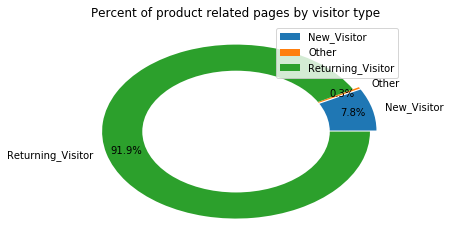

In [68]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.05,0.05,0)
plt.pie(pro_vs, labels=pro_vs.index, colors=colors, autopct='%1.1f%%', explode=explode, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels=pro_vs.index, loc = 'upper right')
plt.title('Percent of product related pages by visitor type')
plt.show()

## Observation
* It is observed that the month of November had the highest spike at 138024 in the number of product pages visited which was a
result of the approximately 92% of the returning visitors.

In [69]:
# product related pages by revenue
prod_revenue = df['ProductRelated'].groupby(df.Revenue).sum()
prod_revenue

Revenue
False    299264
True      91985
Name: ProductRelated, dtype: int64

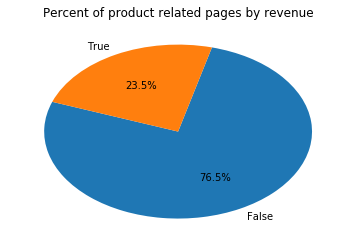

In [70]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(prod_revenue, labels=prod_revenue.index, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Percent of product related pages by revenue')
plt.show()

In [71]:
# product related duration weekend
prod_wknd = df['ProductRelated_Duration'].groupby(df.Weekend).sum().astype(int)/3600
prod_wknd

Weekend
False    3119.947778
True      972.057778
Name: ProductRelated_Duration, dtype: float64

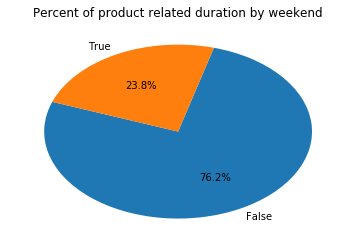

In [72]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(prod_wknd, labels=prod_wknd.index, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Percent of product related duration by weekend')
plt.show()

## Observation
* Approximately 24% visitors made purchase while approximately 77% did not.
* 972 hours was spent on the product related page and approximately 3120 was spent on weekends. 
They visited more on weekdays and completed transactions than weekends.

## Informational Analysis

In [3]:
# view the first five rows to see the columns
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# informational pages visited by month
info_mon = df['Informational'].groupby(df.Month).sum().sort_index(ascending=True)[:10]
info_mon

Month
Aug      235
Dec      885
Feb       16
Jul      223
June     162
Mar      802
May     1426
Nov     1938
Oct      268
Sep      254
Name: Informational, dtype: int64

C:\Users\User\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


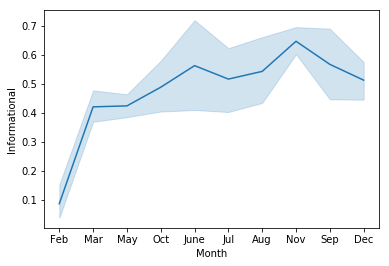

In [7]:
sns.lineplot(x = 'Month', y = 'Informational', data = df, sort = False)

In [9]:
# informational duration spent by month
info_dur_mon = df['Informational_Duration'].groupby(df.Month).sum().sort_index(ascending=True)
info_dur_mon

Month
Aug      15377.720000
Dec      65745.780954
Feb        439.000000
Jul      19664.816667
June      5889.823333
Mar      58494.868338
May      91376.868009
Nov     130817.544862
Oct      21228.142381
Sep      16010.101905
Name: Informational_Duration, dtype: float64

C:\Users\User\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


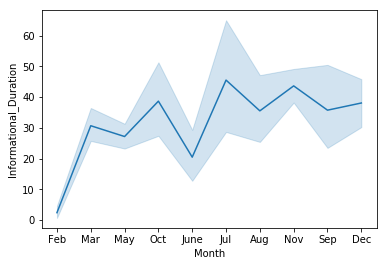

In [11]:
sns.lineplot(x = 'Month', y = 'Informational_Duration', data = df, sort = False)

## Observation
* 36 hours was spent by users on the informational page in November with a total of 1938.

C:\Users\User\anaconda3.5\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\User\anaconda3.5\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\User\anaconda3.5\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


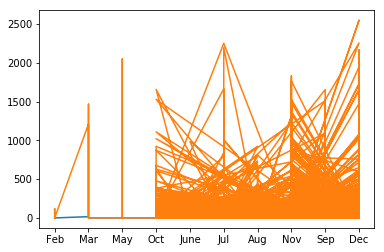

In [12]:
x = df.Month
y = df['Informational']
z = df['Informational_Duration']
plt.plot(x,y)
plt.plot(x,z)
plt.show()

In [13]:
# informational pages spent by bounce rate
info_bounce = df['Informational'].groupby(df.BounceRates).sum().sort_index(ascending=True)
info_bounce

BounceRates
0.000000    1665
0.000027       3
0.000034       2
0.000038       0
0.000039       1
            ... 
0.175000       0
0.176923       0
0.180000       0
0.183333       0
0.200000       6
Name: Informational, Length: 1872, dtype: int64

In [22]:
top5_info = df.groupby('Informational').BounceRates.max().head(5).astype(float).sort_values(ascending=True)
top5_info

Informational
4    0.057801
3    0.070588
2    0.100000
0    0.200000
1    0.200000
Name: BounceRates, dtype: float64

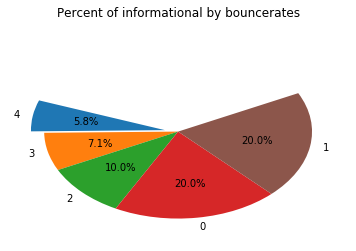

In [23]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.1,0,0,0,0)
plt.pie(top5_info, labels=top5_info.index, colors=colors, autopct='%1.1f%%', explode=explode, startangle=160)
plt.title('Percent of informational by bouncerates')
plt.show()

In [19]:
info_wknd = df['Informational'].groupby(df.Weekend).sum()
info_wknd

Weekend
False    4528
True     1681
Name: Informational, dtype: int64

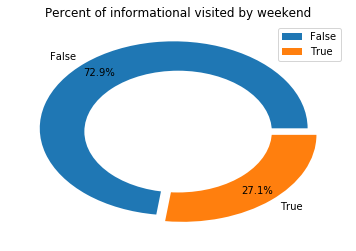

In [21]:
colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#8c564b']
explode=(0.05,0.05)
plt.pie(info_wknd, labels=info_wknd.index, colors=colors, autopct='%1.1f%%', explode=explode, pctdistance=0.85)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.legend(labels=info_wknd.index, loc ='upper right')
plt.title('Percent of informational visited by weekend')
plt.show()

## Observation
* Approximately 73% of users visited the informational pages while 27% visit during the weekend

## Multivariate Analysis
* Generating insights using three or more features

In [12]:
# top 5 most visited pages by the users during online shopping
pages=df.sort_values(['Administrative','Informational','ProductRelated'], axis=0, ascending=False, inplace=False).head()
pages

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8308,27,853.735949,2,126.500000,584,24844.156200,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
12178,26,1561.717567,9,503.722222,183,9676.093180,0.011055,0.014200,19.567464,0.0,Nov,3,2,2,13,Returning_Visitor,False,True
5597,24,468.100663,6,191.866667,189,3428.527381,0.018642,0.043831,0.870148,0.0,June,2,2,2,1,Returning_Visitor,False,False
4937,24,290.860369,6,529.700000,178,4339.534423,0.003939,0.015263,6.149344,0.4,May,2,2,3,4,Returning_Visitor,False,False
1509,24,876.233333,5,625.500000,34,1588.666667,0.000000,0.013801,0.000000,0.0,Mar,2,2,5,2,Returning_Visitor,False,False


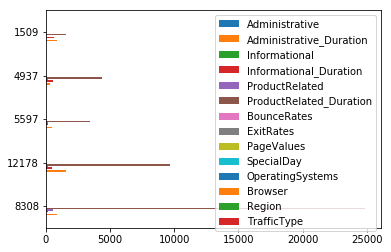

In [9]:
pages.plot.barh()

In [13]:
#correlation between the different parts of the data set
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


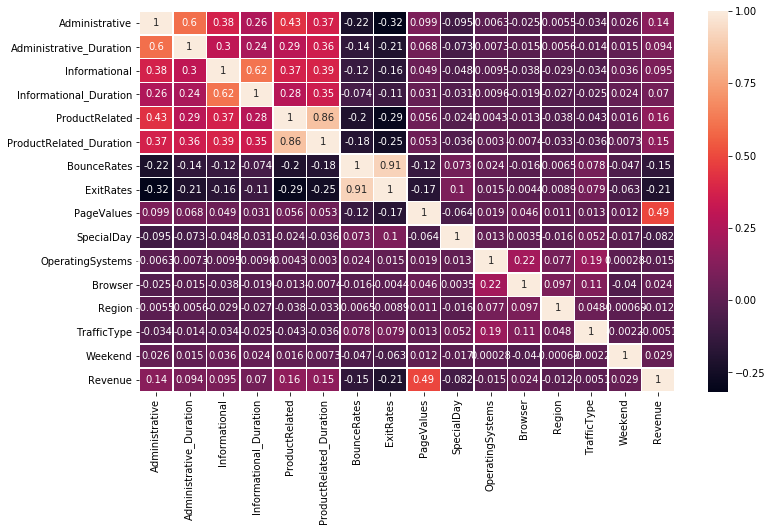

In [15]:
corel = df.corr()
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corel, linewidths = 0.5, annot=True)

In [4]:
total_browser = df.groupby('Browser').sum().sort_values(by = ['Administrative','Informational','ProductRelated'], ascending=False)
total_browser

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Region,TrafficType,Weekend,Revenue
Browser,,,,,,,,,,,,,,,
2,19345,661983.312480,4327,304306.976190,276985,1.044596e+07,170.088344,333.784660,45511.485671,507.4,18568,25268,34108,1785,1223
1,5376,199152.381972,1200,72321.334999,60086,2.215790e+06,64.437951,115.096972,13556.586283,127.8,3401,7112,8365,704,365
4,1460,50728.852046,268,18334.879545,22411,8.533532e+05,12.626121,29.249100,4948.664236,42.2,1471,2416,2285,118,130
5,1056,33505.946571,183,12341.625000,14633,5.485547e+05,9.173443,19.785438,3726.927328,30.8,1001,1451,1533,94,86
10,376,13048.850292,72,5591.791667,5357,1.989230e+05,2.430962,6.167203,1151.505852,12.2,323,512,428,36,32
6,334,14337.742455,72,6757.940000,5198,2.073966e+05,3.216070,7.554200,923.070057,17.0,367,500,648,32,20
8,189,8307.473246,19,512.100000,2433,8.424180e+04,4.201758,7.097432,706.380244,7.8,135,455,897,45,21
3,141,6732.558333,28,2117.552381,1724,7.490738e+04,3.948341,6.147977,271.129349,9.8,314,295,453,33,5
7,137,2609.720000,23,2379.200000,1259,4.632904e+04,1.042844,2.164357,169.037469,2.0,111,172,194,16,6


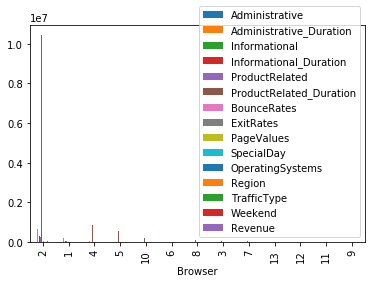

In [24]:
total_browser.plot.bar()

## Linear Regression Analysis

C:\Users\User\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


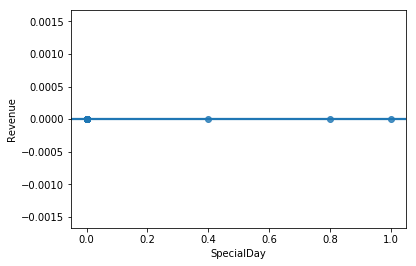

In [3]:
#Simple Linear Regression of special daya dn revenue
simple_lin_reg = df[['SpecialDay','Revenue']].sample(15, random_state=2)
# regression plot
sns.regplot(x = 'SpecialDay',y='Revenue',data=simple_lin_reg)

## Observation
* 8308 users visited the administrative, informational and product related pages: With 27, 2 and 57 respectively.
* From the correlation and heatmap, it was observed that the product related page and product duration has a positive correlation, the exit rates and the bounce rates and it shows most of the ecommmerce transaction was completed.
* Browser 2 has the most user experience with 19345, 4327, and 276985 on the Adminstartive page, Informational page and Product related Page respectively compared to othe browsers.
* From the Linear regression, it shows that there is positive correlation between special days and revenue. which implies that , there was a bit of completed transctions on the Special Days.


## Feature Selection and Engineering
* Encoding categorical variables
* Create new features from existing where necessary, depending on insights from your EDA

In [11]:
#  view all columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [12]:
# Create a function that properly labels revenue, weekends, and visitor types
def revenue(x):
    if x == True:
        return 1
    else:
        return 0
    
def weekend(x):
    if x==True:
        return 1
    else:
        return 0 

# create a new column
df['Revenue_new']=df['Revenue'].apply(revenue)
df['Weekend_new']=df['Weekend'].apply(weekend)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_new,Weekend_new
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,1


In [13]:
#drop columns
df = df.drop(['Revenue','Weekend'], axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue_new,Weekend_new
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,0,1


In [14]:
# select categorical variables
# replace pass with your code

categorical = ['Month','VisitorType']

In [15]:
# one hot encoding using get dummies
categories_dummies = pd.get_dummies(df[categorical])


In [16]:
categories_dummies.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [17]:
df[categorical]

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


In [18]:
# join the encoded variables back to the original data frame
# pass both census_data and categories dummies as a list of their names
# pop out documentation for pd.concat() to clarify

df=pd.concat([df, categories_dummies], axis=1)

# check what you have done

print(df.shape)
df.head()



(12330, 31)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# remove the initial categorical columns now that we have encoded them
# use the list called categorical to delete all the initially selected columns
# replace pass in the code below

df = df.drop(categorical, axis=1)
print(df.shape)
df.head()

(12330, 29)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## Choose Your Target

TO DO:

Set y as revenue_new which is the target. x as data

You can drop () to remove revenue_new column target when doing this assignment.

In [20]:
#my codes here:
y = df.Revenue_new
X = df.drop('Revenue_new', axis=1)

## Create Train and Test Datasets
Split your dataset into train and test. Your test set will be used to evaluate your trained model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# splitting into training and testing data using a 20% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=0)

## Preparing Models

In [23]:
# import libraries we'll need for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

#ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm

#Ml Metrics
from sklearn.metrics import accuracy_score, classification_report

#visualizations
import seaborn as sns

C:\Users\User\anaconda3.5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Feature Scaling
* Scaling is done to normalize the features in the dataset into a finite range i.e between 0 and 1. Logistic regression expects data to be scaled

In [25]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [27]:
#data scaling steps for trained data set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [40]:

# Initialize Logistic Regression
LR = LogisticRegression()

# initialize Kneighbors
KN = KNeighborsClassifier()

# initialize decision tree
DC = DecisionTreeClassifier

# initialize random forest
RF = RandomForestClassifier()

#Creat a list of your model names
models = [LR,KN,DC,RF]

In [29]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_,
               cmap='coolwarm',
               linecolor='white',
               linewidths=1,
               annot=True,
               fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.show()
               

In [30]:
from sklearn.metrics import confusion_matrix

In [37]:
# create funcion to train model and evaluate accuracy
def trainer(model, X_train, y_train, X_valid, y_valid):
    #fit my model
    model.fit(X_train, y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #Print evaluation metric
   # print('\nFor {}, Accuracy score is {} \n'.format(model._class_._name_,accuracy_score(y_train,y_valid)))
    print(classification_report(prediction, y_valid))
    plot_confusion_matrix(y_valid, prediction)

             precision    recall  f1-score   support

          0       0.10      0.95      0.18       210
          1       0.97      0.18      0.31      2256

avg / total       0.90      0.25      0.30      2466



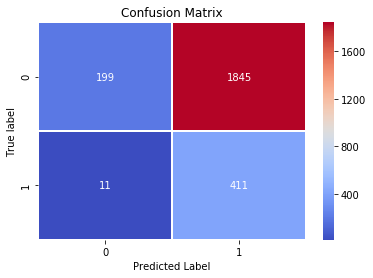

             precision    recall  f1-score   support

          0       0.99      0.83      0.90      2446
          1       0.00      0.05      0.00        20

avg / total       0.98      0.82      0.89      2466



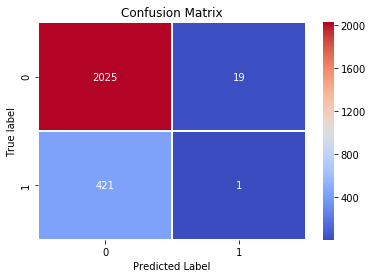

TypeError: fit() missing 1 required positional argument: 'y'

In [38]:
# loop through each model trainig set
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

In [42]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue_new',
       'Weekend_new', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

## A Bit of Feature Selection

In [46]:
#Create a new X_train
X_train2 = X_train[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_Other','VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb']]
X_train2.head(2)

,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb
2509,-0.137908,-0.210867,1.598193,-0.268323,-0.083316,0.411598,-0.190948,-0.405008,-0.125103
11116,-0.137908,4.454108,-0.898045,-0.516005,-0.083316,0.411598,-0.190948,2.469089,-0.125103


In [47]:
X_valid2 = X_valid[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_Other','VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb']]
X_valid2

,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb
12245,2,2,1,2,0,1,0,0,0
9704,2,6,7,1,0,1,0,1,0
9177,3,2,8,2,0,1,0,0,0
8848,3,2,5,20,0,1,0,0,0
2768,4,1,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
9606,1,1,3,6,0,1,0,0,0
9095,1,1,4,6,0,1,0,1,0
3172,2,4,4,2,0,0,0,0,0
8009,3,2,3,1,0,1,0,0,0


In [48]:
#train and predict
RF.fit(X_train2, y_train)
pred2 = RF.predict(X_valid2)
print(accuracy_score(pred2, y_valid))

0.6695052716950527
